In [125]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from scipy.stats import norm
from math import exp, log,sqrt
from sympy import Symbol, diff, erf, sqrt, init_printing, ln, exp, diff, lambdify
import matplotlib.pyplot as plt

%matplotlib inline
class Stock:
    def __init__(self,ticker):
        self.ticker1 = ticker
        self.ticker = yf.Ticker(ticker)
        lastDay= self.ticker.history(period="1d")
        lastDay = lastDay['Close'][0]
        lastDay = round(lastDay,2)
        self.price = lastDay
    def getCurrPrice(self):
        return self.price
   # def get2DSMA(self):
        
  #  def get10DSMA(self):

 #   def MACD(self):

    def getTicker(self):
        return self.ticker1

#    def BollingerBands(self):  
#        price = self.price
#        df = self.ticker.history(period='6m')[['Close']]
#        print(df['Close'])
#        sma20D = df['Close'].rolling(window = 20).mean()
#        print(sma20D)
#        mean = np.mean(sma20D)
#        std =  np.std(sma20D)
#        lowerBand = self.price - (2 * std)
#        upperBand = self.price + (2 * std)
#        print(upperBand)
#        print(lowerBand)
#        if self.price >= upperBand:
#            return "Bullish"
#        elif self.price <=lowerBand:
#            return "Bearish"
#        else:
#            return "null"
        
   # def rsi(self):


    def getCompanyInfo(self):
        info = self.ticker.info['longBusinessSummary']
        return info

    def get1dChange(self):
        try:
            recent = self.price
            old = self.ticker.history(period = "1d")
            old = old['High'][0]
            percentChange = ((recent-old)/old)*100
            percentChange = round(percentChange,4)
            return percentChange
        except:
            return np.nan
    def get5dChange(self):
        try:
            recent = self.price
            old = self.ticker.history(period = "5d")
            old = old['High'][0]
            percentChange = ((recent-old)/old)*100
            percentChange = round(percentChange,4)
            return percentChange
        except:
            return np.nan
    def get1mChange(self):
        try:
            recent = self.price
            old = self.ticker.history(period = "1mo")
            old = old['High'][0]
            percentChange = ((recent-old)/old)*100
            percentChange = round(percentChange,4)
            return percentChange
        except:
            return np.nan
    def get6mChange(self):
        try:
            recent = self.price
            old = self.ticker.history(period = "6mo")
            old = old['High'][0]
            percentChange = ((recent-old)/old)*100
            percentChange = round(percentChange,4)
            return percentChange
        except:
            return np.nan
    def get1yChange(self):
        try:
            recent = self.price
            old = self.ticker.history(period = "1y")
            old = old['High'][0]
            percentChange = ((recent-old)/old)*100
            percentChange = round(percentChange,4)
            return percentChange
        except:
            return np.nan

    def get5yChange(self):
        try:
            recent = self.price
            old = self.ticker.history(period = "5y")
            old = old['High'][0]
            percentChange = ((recent-old)/old)*100
            percentChange = round(percentChange,4)
            return percentChange
        except:
            return np.nan
    def isSP500(self):
        uploaded_data = open("stocks.csv", "r")
        df = pd.read_csv(uploaded_data)
        stockList = list(df['Symbol'].unique())        
        for i in range(len(stockArr)):
            try:
                if(self.ticker1 == arr[i]):
                    return "This ticker is in the S&P 500."
            except:
                pass             
        return "This ticker is not in the S&P 500."

    def getIntrinsicValue(self):
        cashflowStatements = []
        cashflow = self.ticker.cashflow
        freeCashFlow4 = float(cashflow.loc["Total Cash From Operating Activities"][0]) + (cashflow.loc["Capital Expenditures"][0])
        freeCashFlow3 = float(cashflow.loc["Total Cash From Operating Activities"][1]) + (cashflow.loc["Capital Expenditures"][1])
        freeCashFlow2 = float(cashflow.loc["Total Cash From Operating Activities"][2]) + (cashflow.loc["Capital Expenditures"][2])
        freeCashFlow1 = float(cashflow.loc["Total Cash From Operating Activities"][3]) + (cashflow.loc["Capital Expenditures"][3])
        freeCashFlow35 = float(freeCashFlow4 + freeCashFlow3)/ 2
        freeCashFlow25 = float(freeCashFlow3 + freeCashFlow2) / 2
        freeCashFlow15 = float(freeCashFlow2 + freeCashFlow1) / 2
        cashflowStatements.append(freeCashFlow4)
        cashflowStatements.append(freeCashFlow35)
        cashflowStatements.append(freeCashFlow3)
        cashflowStatements.append(freeCashFlow25)
        cashflowStatements.append(freeCashFlow2)
        cashflowStatements.append(freeCashFlow15)
        cashflowStatements.append(freeCashFlow1)
        years = [4.0,3.5,3.0,2.5,2.0,1.5,1.0]
        df = pd.DataFrame()
        df [ "Cash Flow Statements"] = cashflowStatements
        df [" Years"] = years
        y = df.iloc[:, 0].values
        X = df.iloc[:, 1].values
        X = X.reshape(len(X),1)
        y = y.reshape(len(y),1)
        forecast = []
        try:
            from sklearn.linear_model import LinearRegression
            lin_reg = LinearRegression()
            lin_reg.fit(X, (y))
            from sklearn.preprocessing import PolynomialFeatures
            poly_reg = PolynomialFeatures(degree = 4)
            X_poly = poly_reg.fit_transform(X)
            lin_reg_2 = LinearRegression()
            lin_reg_2.fit(X_poly, abs(y))
            from sklearn.metrics import r2_score
            pr2 = r2_score(abs(y),lin_reg_2.predict(poly_reg.fit_transform(X)))
            from sklearn.preprocessing import StandardScaler
            sc_X = StandardScaler()
            sc_y = StandardScaler()
            X = sc_X.fit_transform(X)
            y = sc_y.fit_transform(y)
            from sklearn.ensemble import RandomForestRegressor
            regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
            regressor.fit(X, (y))
            rfr2 = r2_score(sc_y.inverse_transform((y)),sc_y.inverse_transform(regressor.predict(X)))
            from sklearn.preprocessing import StandardScaler
            sc_X = StandardScaler()
            sc_y = StandardScaler()
            X = sc_X.fit_transform(X)
            y = sc_y.fit_transform(y)
            from sklearn.svm import SVR
            regressor = SVR(kernel = 'rbf')
            regressor.fit(X, (y))
            svrr2 = r2_score(sc_y.inverse_transform((y)), sc_y.inverse_transform(regressor.predict(X)))
            #print(svrr2)
            y = df.iloc[:, 0].values
            X = df.iloc[:, 1].values
            X = X.reshape(len(X),1)
            y = y.reshape(len(y),1)
            value = int(1)
            dne = str("")
            if(pr2 > rfr2 and pr2 > svrr2):
                from sklearn.linear_model import LinearRegression
                lin_reg = LinearRegression()
                lin_reg.fit(X, (y))
                from sklearn.preprocessing import PolynomialFeatures
                poly_reg = PolynomialFeatures(degree = 4)
                X_poly = poly_reg.fit_transform(X)
                lin_reg_2 = LinearRegression()
                lin_reg_2.fit(X_poly, (y))
                pr2 = r2_score((y),lin_reg_2.predict(poly_reg.fit_transform(X)))
                #forecast.append(abs(lin_reg_2.predict(poly_reg.fit_transform([[4.5]]))))
                forecast.append((lin_reg_2.predict(poly_reg.fit_transform([[5.0]]))))
                #forecast.append(abs(lin_reg_2.predict(poly_reg.fit_transform([[5.5]]))))
                forecast.append((lin_reg_2.predict(poly_reg.fit_transform([[6.0]]))))
                #forecast.append(abs(lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))))
                forecast.append((lin_reg_2.predict(poly_reg.fit_transform([[7.0]]))))
                #forecast.append(abs(lin_reg_2.predict(poly_reg.fit_transform([[7.5]]))))
                forecast.append((lin_reg_2.predict(poly_reg.fit_transform([[8.0]]))))
                X_grid = np.arange(min(X), max(X), 0.1)
                X_grid = X_grid.reshape((len(X_grid), 1))
                # plt.scatter(X, (y), color = 'red')
                # plt.plot(X_grid, (lin_reg_2.predict(poly_reg.fit_transform(X_grid))), color = 'blue')
                # plt.title('Free Cash Flow (Polynomial Regression) of '+ ticker)
                # plt.xlabel('Years from 2016-2020')
                # plt.ylabel('Free Cash Flow')
                # plt.show()
            elif(rfr2 > pr2 and rfr2 > svrr2): 
                from sklearn.preprocessing import StandardScaler
                sc_X = StandardScaler()
                sc_y = StandardScaler()
                X = sc_X.fit_transform(X)
                y = sc_y.fit_transform(y)
                from sklearn.ensemble import RandomForestRegressor
                regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
                regressor.fit(X, y)
                rfr2 = r2_score(sc_y.inverse_transform(y),sc_y.inverse_transform(regressor.predict(X)))
                #forecast.append(abs(regressor.predict([[4.5]])))
                forecast.append((regressor.predict([[5.0]])))
                #forecast.append(abs(regressor.predict([[5.5]])))
                forecast.append((regressor.predict([[6.0]])))
                #forecast.append(abs(regressor.predict([[6.5]])))
                forecast.append((regressor.predict([[7.0]])))
                #forecast.append(abs(regressor.predict([[7.5]])))
                forecast.append((regressor.predict([[8.0]])))
                X_grid = np.arange(min(X), max(X), 0.01)
                X_grid = X_grid.reshape((len(X_grid), 1))
                #  plt.scatter(X, y, color = 'red')
                #  plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
                #  plt.title('Free Cash Flow (Random Forest Regression) of '+ ticker)
                #  plt.xlabel('Years from 2016-2020')
                #  plt.ylabel('Free Cash Flow')
                #  plt.show()
            elif(svrr2 > pr2 and svrr2 > rfr2):
                from sklearn.preprocessing import StandardScaler
                sc_X = StandardScaler()
                sc_y = StandardScaler()
                X = sc_X.fit_transform(X)
                y = sc_y.fit_transform(y)
                from sklearn.svm import SVR
                regressor = SVR(kernel = 'rbf')
                regressor.fit(X, y)
                from sklearn.metrics import r2_score
                svrr2 = r2_score(sc_y.inverse_transform(y), sc_y.inverse_transform(regressor.predict(X)))
                #forecast.append(abs(sc_y.inverse_transform(regressor.predict(sc_X.transform([[4.5]])))))
                forecast.append((sc_y.inverse_transform(regressor.predict(sc_X.transform([[5.0]])))))
                #forecast.append(abs(sc_y.inverse_transform(regressor.predict(sc_X.transform([[5.5]])))))
                forecast.append((sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.0]])))))
                #forecast.append(abs(sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])))))
                forecast.append((sc_y.inverse_transform(regressor.predict(sc_X.transform([[7.0]])))))
                #forecast.append(abs(sc_y.inverse_transform(regressor.predict(sc_X.transform([[7.5]])))))
                forecast.append((sc_y.inverse_transform(regressor.predict(sc_X.transform([[8.0]])))))
                X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
                X_grid = X_grid.reshape((len(X_grid), 1))
                fig = plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y),color = 'red')
                fig = plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid))), color = 'blue')
            #  plt.title('Free Cash Flow (SVR) of '+ ticker)
            #  plt.xlabel('Years from 2016-2020')
            #  plt.ylabel('Free Cash Flow')
        except:
            value = (0)

        try:
            dr = 0.20
            pgr = float(0.025)
            count = float(0)
            totalFreeCashFlow = float(0)
            for t in range(len(forecast)):
                val1 = (forecast[t] / pow((1+dr),t+1))
                totalFreeCashFlow += forecast[t]
                count += val1
            count = count[0][0]
            #print(count)
            totalFreeCashFlow = totalFreeCashFlow[0][0]
            yf.Ticker(self.ticker1[0])
            roi = 1 - (count/totalFreeCashFlow)
            percentGrowth = ((forecast[3]-forecast[0])/ forecast[0]*4)
            totalPercentGrowth= ((10/4) * (percentGrowth**10)) ** (1/10)
            intrinsicValue = totalPercentGrowth * forecast[0]
            stock = self.ticker
            lastDay= stock.history(period="1d")
            lastDay = lastDay['Close'][0]
            termVal =float(forecast[3] * (1+pgr)/(dr-pgr))
            forecast.append(termVal)
            for z in range (len(forecast)):
                forecast[z] = abs(forecast[z])
            sharesOutstanding = float(self.ticker.info['sharesOutstanding'])
            dcfvals = [(1+dr), (1 +dr)*(1+dr), ((1+dr)*(1+dr)*(1+dr)),((1+dr)*(1+dr)*(1+dr)*(1+dr)),((1+dr)*(1+dr)*(1+dr)*(1+dr))]
            #print(lastDay)
            discountedCashFlow = []
            totVal = float()
            for y in range (len(forecast)):
                discountedCashFlow.append((forecast[y]/pow(2,y))/dcfvals[y])
                totVal +=((forecast[y]/pow(2,y-1))/dcfvals[y])
            #print(discountedCashFlow)
            iVal = float(totVal/sharesOutstanding)
            #print(totVal)
            iVal = round(iVal,2)
            if (freeCashFlow1 < 0 or freeCashFlow2 < 0 or freeCashFlow3 < 0 or freeCashFlow4 <0):
                iVal = float(0)
            if (value == 0):
                dne = "This stock has decreasing cash flows or negative cash flows and shouldn't be invested in for the long term. "
                intrinsicVal = float(0)
            else:
                dne = "This stock has positive cash flows and you should consider investing in it if it is below the intrinsic value"

  
        except:
            #iVal = float(0)
            dne = "This stock has decreasing cash flows  or negative cash flows and shouldn't be invested in for the long term. "


        return iVal








In [126]:
class ProfitableSort:
    def __init__(self,tickerArray,df):
        arr = []
        arr1 = []
        for j in range(len(tickerArray)):
            try:
                arr.append(tickerArray[j])
                arr1.append(tickerArray[j].get1mChange())
            except:
                pass
        self.array = arr
        self.sortedArray = arr1
        self.data = df
    def getSpecificTicker(self,ticker):
        arr = self.aray
        for i in range(len(stockArr)):
            try:
                if(ticker == arr[i]):
                    return arr[i]
            except:
                pass             

        return "There is no Ticker in this dataframe"
    def display(self):
        arr = self.array
        df = self.data
        price = []
        dayChange = []
        dayChange2 = []
        monthChange = []
        monthChange2 =[]
        yearChange = []
        yearChange2 = []
        #self.data = pd.DataFrame(columns = ['Ticker','1 Day %Change','5 Day %Change','1 Month %Change','6 Month %Change' ,'1 Year %Change', '5 Year %Change'])
        for c in range(len(arr)):
            dayChange.append(arr[c].get1dChange())
            dayChange2.append(arr[c].get5dChange())
            monthChange.append(arr[c].get1mChange())
            monthChange2.append(arr[c].get6mChange())
            yearChange.append(arr[c].get1yChange())
            yearChange2.append(arr[c].get5yChange())
        print(dayChange)

            #df = self.data.append({'Ticker':arr[c].getTicker(),'1 Day %Change':arr[c].get1dChange(),'5 Day %Change':arr[c].get5dChange(),'1 Month %Change':arr[c].get1mChange(),'6 Month %Change':arr[c].get6mChange(),'1 Year %Change':arr[c].get1yChange(),'5 Year %Change':arr[c].get5yChange()},ignore_index = True)
        df['1 Day %Change'] = dayChange
        df['5 Day %Change'] = dayChange2
        df['1 Month %Change'] = monthChange
        df['6 Month %Change'] = monthChange2
        df['1 Year %Change'] = yearChange
        df['5 Year %Change'] = yearChan
        return df
    def returnDf(self):
        df2 = self.data
        arr = self.array
        price = []
        dayChange = []
        dayChange2 = []
        monthChange = []
        monthChange2 =[]
        yearChange = []
        yearChange2 = []
        #self.data = pd.DataFrame(columns = ['Ticker','1 Day %Change','5 Day %Change','1 Month %Change','6 Month %Change' ,'1 Year %Change', '5 Year %Change'])
        for z in range(len(arr)):
            try:
                price.append(arr[z].getCurrPrice())
                dayChange.append(arr[z].get1dChange())
                dayChange2.append(arr[z].get5dChange())
                monthChange.append(arr[z].get1mChange())
                monthChange2.append(arr[z].get6mChange())
                yearChange.append(arr[z].get1yChange())
                yearChange2.append(arr[z].get5yChange())
            except:
                price.append(np.nan)
                dayChange.append(np.nan)
                dayChange2.append(np.nan)
                monthChange.append(np.nan)
                monthChange2.append(np.nan)
                yearChange.append(np.nan)
                yearChange2.append(np.nan)
        df2.insert(3,"Current Price", price,True)
        df2.insert(4,"1 Day %Change",dayChange,True)
        df2.insert(5,"5 Day %Change",dayChange2,True)
        df2.insert(6,"1 Month %Change",monthChange,True)
        df2.insert(7,"6 Month %Change",monthChange2,True)
        df2.insert(8,"1 Year %Change",yearChange,True)
        df2.insert(9,"5 Year %Change",yearChange2,True)
        return df2
    def mergeSort(self,myList):
        if len(myList) > 1:
            mid = len(myList) // 2
            left = myList[:mid]
            right = myList[mid:]

            # Recursive call on each half
            self.mergeSort(left)
            self.mergeSort(right)

            # Two iterators for traversing the two halves
            i = 0
            j = 0
        
            # Iterator for the main list
            k = 0
        
            while i < len(left) and j < len(right):
                if left[i].get1mChange() <= right[j].get1mChange():
                    # The value from the left half has been used
                    myList[k] = left[i]
                    # Move the iterator forward
                    i += 1
                else:
                    myList[k] = right[j]
                    j += 1
                # Move to the next slot
                k += 1

            # For all the remaining values
            while i < len(left):
                myList[k] = left[i]
                i += 1
                k += 1

            while j < len(right):
                myList[k]=right[j]
                j += 1
                k += 1
        newList = []
        for p in range(len(myList)):
            newList.append(Stock(myList[len(myList)-1 -p].getTicker()))

        df = pd.DataFrame(columns = ['Ticker','1 Day %Change','5 Day %Change','1 Month %Change','6 Month %Change' ,'1 Year %Change', '5 Year %Change'])
        for c in range(len(newList)):
            df = df.append({'Ticker':newList[c].getTicker(),'1 Day %Change':newList[c].get1dChange(),'5 Day %Change':newList[c].get5dChange(),'1 Month %Change':newList[c].get1mChange(),'6 Month %Change':newList[c].get6mChange(),'1 Year %Change':newList[c].get1yChange(),'5 Year %Change':newList[c].get5yChange()},ignore_index = True)
        return df

    

    #def merge(self,left,right):

    #def mergeSort(self):
        

In [127]:
class Options:
    def __init__(self,ticker, strikePrice, timeToExpiration,riskFreeRate):
        self.ticker = ticker
        self.stockOptionData = yf.Ticker(ticker)
        lastDay= self.stockOptionData.history(period="1d")
        lastDay = lastDay['Close'][0]
        lastDay = round(lastDay,2)
        self.S = float(lastDay)
        self.K = float(strikePrice)
        self.T = float(timeToExpiration)
        self.r = riskFreeRate
        symbols = [self.ticker, 'SPY']
        data = yf.download(symbols,'2021-6-2')['Adj Close']
        price_change = data.pct_change()
        df = price_change.drop(price_change.index[0])
        x = np.array(df[self.ticker]).reshape((-1,1))
        y = np.array(df['SPY'])
        model = LinearRegression().fit(x,y)
        self.sigma = float(model.coef_[0])
        self.d1 = 0.0
        self.d2 = 0.0
        self.callPrice = 0.0 
        self.putPrice = 0.0
            

    #K = Strike Price
    #St = Price of Asset
    #t = time to maturity
    # o = volatility of the asset
    #r = risk-free interest rate
    #Call Option Price = normcdf(d1)*St - normcdf(d2)*Ke^(-rt)
    #Put Option Price = Ke^(-rt) * N(-d2) - S0N(-d1)
    #d1 = (ln(St/K)+(r+(o^2/2))*t)/(o*√t)
    #d2 = d1 - o*√t

    def findD1(self):
        self.d1 = ((np.log(self.S / self.K)) + ((self.r + self.sigma ** 2.0)//2) * self.T)/(self.sigma * np.sqrt(self.T))
        return self.d1
    def findD2(self):
        self.d2 = self.findD1() - self.sigma * sqrt(self.T)
        return self.d2
    #Returns call Option Price
    def calculateIdealCall(self):
        d1 = np.multiply( 1. / self.sigma * np.divide(1., np.sqrt(self.T)),
            np.log(self.S/self.K) + (self.r + self.sigma**2 / 2.) * self.T )
        d2 = d1 - self.sigma * np.sqrt(self.T)
        self.call = np.multiply(self.S, norm.cdf(d1)) - \
            np.multiply(norm.cdf(d2) * self.K, np.exp(-self.r * self.T))
        return self.call
    # Returns put Option Price
    def calculateIdealPut(self):
        d1 = np.multiply( 1. / self.sigma * np.divide(1., np.sqrt(self.T)),  np.log(self.S/self.K) + (self.r + self.sigma**2 / 2.) * self.T)
        d2 = d1 - self.sigma * np.sqrt(self.T)
        self.put = -np.multiply(self.S, norm.cdf(-d1)) + \
        np.multiply(norm.cdf(-d2) * self.K, np.exp(-self.r * self.T))
        return self.put

    def getTimeGreeks(self):
        S = Symbol('S', real = True)
        K = Symbol('K', real = True)
        r = Symbol('r', real = True)
        t = Symbol('t', real = True)
        sigma = Symbol('sigma', real = True)
        d1 = 1 / (sigma * sqrt(t)) * (ln(S/K) + (r + sigma**2 / 2) * t)
        d2 = d1 - sigma * sqrt(t)
        C = S * 0.5 * (1 + erf(d1 / sqrt(2))) - K * exp(-r * t) * 0.5 * (1 + erf(d2 / sqrt(2)))
        dt1 = diff(C,t)
        dt2 = diff(dt1,t)
        dt3 = diff(dt2,t)
        dt4 = diff(dt3,t)
        dt5 = diff(dt4,t)
        dt6 = diff(dt5,t)  
        dt7 = diff(dt6,t)
        dt8 = diff(dt7,t)
        #dt9 = diff(dt8,t)
        #dt10 = diff(dt9,t)
        output0 = lambdify((sigma, S,K,r,t),self.calculateIdealCall())  
        output1 = lambdify((sigma, S,K,r,t),dt1)  
        output2 = lambdify((sigma, S,K,r,t),dt2)  
        output3 = lambdify((sigma, S,K,r,t),dt3)  
        output4 = lambdify((sigma, S,K,r,t),dt4)  
        output5 = lambdify((sigma, S,K,r,t),dt5)  
        output6 = lambdify((sigma, S,K,r,t),dt6)  
        output7 = lambdify((sigma,S,K,r,t),dt7)
        output8 = lambdify((sigma,S,K,r,t),dt8)
        #output9 = lambdify((sigma,S,K,r,t),dt9)
        #output10 = lambdify((sigma,S,K,r,t),dt10)

        return [output0(self.sigma, self.S, self.K, self.r, self.T), 
        output1(self.sigma, self.S, self.K, self.r, self.T), 
        output2(self.sigma, self.S, self.K, self.r, self.T), 
        output3(self.sigma, self.S, self.K, self.r, self.T), 
        output4(self.sigma, self.S, self.K, self.r, self.T), 
        output5(self.sigma, self.S, self.K, self.r, self.T), 
        output6(self.sigma, self.S, self.K, self.r, self.T),
        output7(self.sigma, self.S, self.K, self.r, self.T), 
        output8(self.sigma, self.S, self.K, self.r, self.T), 
        #output9(self.sigma, self.S, self.K, self.r, self.T), 
        #output10(self.sigma, self.S, self.K, self.r, self.T),
         ]
    def getDifferentiablePuts(self):
        S = Symbol('S', real = True)
        K = Symbol('K', real = True)
        r = Symbol('r', real = True)
        t = Symbol('t', real = True)
        sigma = Symbol('sigma', real = True)
        d1 = 1 / (sigma * sqrt(t)) * (ln(S/K) + (r + sigma**2 / 2) * t)
        d2 = d1 - sigma * sqrt(t)
        P = K * exp(-r * t) * 0.5 * (1 + erf(-d2 / sqrt(2)))- S * 0.5 * (1 + erf(-d1 / sqrt(2)))
        dt1 = diff(P,t)
        dt2 = diff(dt1,t)
        dt3 = diff(dt2,t)
        dt4 = diff(dt3,t)
        dt5 = diff(dt4,t)
        dt6 = diff(dt5,t)  
        dt7 = diff(dt6,t)
        dt8 = diff(dt7,t)
        #dt9 = diff(dt8,t)
        #dt10 = diff(dt9,t)
        output0 = lambdify((sigma, S,K,r,t),self.calculateIdealPut())  
        output1 = lambdify((sigma, S,K,r,t),dt1)  
        output2 = lambdify((sigma, S,K,r,t),dt2)  
        output3 = lambdify((sigma, S,K,r,t),dt3)  
        output4 = lambdify((sigma, S,K,r,t),dt4)  
        output5 = lambdify((sigma, S,K,r,t),dt5)  
        output6 = lambdify((sigma, S,K,r,t),dt6)  
        output7 = lambdify((sigma,S,K,r,t),dt7)
        output8 = lambdify((sigma,S,K,r,t),dt8)
        #output9 = lambdify((sigma,S,K,r,t),dt9)
        #output10 = lambdify((sigma,S,K,r,t),dt10)

        return [output0(self.sigma, self.S, self.K, self.r, self.T), 
        output1(self.sigma, self.S, self.K, self.r, self.T), 
        output2(self.sigma, self.S, self.K, self.r, self.T), 
        output3(self.sigma, self.S, self.K, self.r, self.T), 
        output4(self.sigma, self.S, self.K, self.r, self.T), 
        output5(self.sigma, self.S, self.K, self.r, self.T), 
        output6(self.sigma, self.S, self.K, self.r, self.T),
        output7(self.sigma, self.S, self.K, self.r, self.T), 
        output8(self.sigma, self.S, self.K, self.r, self.T), 
        #output9(self.sigma, self.S, self.K, self.r, self.T), 
        #output10(self.sigma, self.S, self.K, self.r, self.T),
         ] 


    def makeTaylorApproximationTimeGreeks1st(self):
        tspan = np.linspace(1, 0,366)
        d1 = np.multiply( 1. / self.sigma * np.divide(1., np.sqrt(tspan)),
        np.log(self.S/self.K) + (self.r + self.sigma**2 / 2.) * tspan )
        d2 = d1 - self.sigma * np.sqrt(tspan)
        call = np.multiply(self.S, norm.cdf(d1)) - \
        np.multiply(norm.cdf(d2) * self.K, np.exp(-self.r * tspan))
        
        plt.plot(tspan, call, 'k', label = 'Black-Scholes Model')
        plt.xlim(1, 0)
        plt.grid(True)
        plt.xlabel('Time to Expiration (Y)')
        plt.ylabel('Call price ($)')
        timeGreeks = self.getTimeGreeks()
        c0 = timeGreeks[0]
        dt1= timeGreeks[1]
        taylor = call[0] + dt1 * (tspan-1)
        fig,ax = plt.subplots(figsize=(10, 6))
        ax.plot(tspan, call, 'k', label = 'Black-Scholes Model')
        #ax.xlim(1, 0)
        #ax.grid(True)
        #ax.xlabel('Time to Expiration (Y)')
        #ax.ylabel('Call price ($)')
        ax.plot(tspan, taylor, 'y', label = 'Taylor Approx')
        ax.legend()   
        return fig  
    def makeTaylorApproximationTimeGreeks2nd(self):
        tspan = np.linspace(1, 0,366)
        d1 = np.multiply( 1. / self.sigma * np.divide(1., np.sqrt(tspan)),
        np.log(self.S/self.K) + (self.r + self.sigma**2 / 2.) * tspan )
        d2 = d1 - self.sigma * np.sqrt(tspan)
        call = np.multiply(self.S, norm.cdf(d1)) - \
        np.multiply(norm.cdf(d2) * self.K, np.exp(-self.r * tspan))
        plt.plot(tspan, call, 'k', label = 'Black-Scholes Model')
        plt.xlim(1, 0)
        plt.grid(True)
        plt.xlabel('Time to Expiration (Y)')
        plt.ylabel('Call price ($)')
        timeGreeks = self.getTimeGreeks()
        c0 = timeGreeks[0]
        dt1= timeGreeks[1]
        dt2= timeGreeks[2]
        taylor = call[0] + dt1 * (tspan-1)
        taylor = taylor + dt2 / np.math.factorial(2) * (tspan-1)**2
        fig,ax = plt.subplots(figsize=(10, 6))
        ax.plot(tspan, call, 'k', label = 'Black-Scholes Model')
        #ax.xlim(1, 0)
        #ax.grid(True)
        #ax.xlabel('Time to Expiration (Y)')
        #ax.ylabel('Call price ($)')
        ax.plot(tspan, taylor, 'y', label = 'Taylor Approx')
        ax.legend()   
        return fig
    def makeTaylorApproximationTimeGreeks4th(self):
        tspan = np.linspace(1, 0,366)
        d1 = np.multiply( 1. / self.sigma * np.divide(1., np.sqrt(tspan)),
        np.log(self.S/self.K) + (self.r + self.sigma**2 / 2.) * tspan )
        d2 = d1 - self.sigma * np.sqrt(tspan)
        call = np.multiply(self.S, norm.cdf(d1)) - \
        np.multiply(norm.cdf(d2) * self.K, np.exp(-self.r * tspan))
        plt.plot(tspan, call, 'k', label = 'Black-Scholes Model')
        plt.xlim(1, 0)
        plt.grid(True)
        plt.xlabel('Time to Expiration (Y)')
        plt.ylabel('Call price ($)')
        timeGreeks = self.getTimeGreeks()
        c0 = timeGreeks[0]
        dt1= timeGreeks[1]
        dt2= timeGreeks[2]
        dt3= timeGreeks[3]
        dt4= timeGreeks[4]
        taylor = call[0] + dt1 * (tspan-1)
        taylor = taylor + dt2 / np.math.factorial(2) * (tspan-1)**2
        taylor = taylor + dt3 / np.math.factorial(3) * (tspan-1)**3
        taylor = taylor + dt4 / np.math.factorial(4) * (tspan-1)**4
        fig,ax = plt.subplots(figsize=(10, 6))
        ax.plot(tspan, call, 'k', label = 'Black-Scholes Model')
        #ax.xlim(1, 0)
        #ax.grid(True)
        #ax.xlabel('Time to Expiration (Y)')
        #ax.ylabel('Call price ($)')
        ax.plot(tspan, taylor, 'y', label = 'Taylor Approx')
        ax.legend()   
        return fig

    def makeTaylorApproximationTimeGreeks6th(self):
        tspan = np.linspace(1, 0,366)
        d1 = np.multiply( 1. / self.sigma * np.divide(1., np.sqrt(tspan)),
        np.log(self.S/self.K) + (self.r + self.sigma**2 / 2.) * tspan )
        d2 = d1 - self.sigma * np.sqrt(tspan)
        call = np.multiply(self.S, norm.cdf(d1)) - \
        np.multiply(norm.cdf(d2) * self.K, np.exp(-self.r * tspan))
        plt.plot(tspan, call, 'k', label = 'Black-Scholes Model')
        plt.xlim(1, 0)
        plt.grid(True)
        plt.xlabel('Time to Expiration (Y)')
        plt.ylabel('Call price ($)')
        timeGreeks = self.getTimeGreeks()
        c0 = timeGreeks[0]
        dt1= timeGreeks[1]
        dt2= timeGreeks[2]
        dt3= timeGreeks[3]
        dt4= timeGreeks[4]
        dt5= timeGreeks[5]
        dt6= timeGreeks[6]
        taylor = call[0] + dt1 * (tspan-1)
        taylor = taylor + dt2 / np.math.factorial(2) * (tspan-1)**2
        taylor = taylor + dt3 / np.math.factorial(3) * (tspan-1)**3
        taylor = taylor + dt4 / np.math.factorial(4) * (tspan-1)**4
        taylor = taylor + dt5 / np.math.factorial(5) * (tspan-1)**5
        taylor = taylor + dt6 / np.math.factorial(6) * (tspan-1)**6
        fig,ax = plt.subplots()
        ax.plot(tspan, call, 'k', label = 'Black-Scholes Model')
        #ax.xlim(1, 0)
        #ax.grid(True)
        #ax.xlabel('Time to Expiration (Y)')
        #ax.ylabel('Call price ($)')
        ax.plot(tspan, taylor, 'y', label = 'Taylor Approx')
        ax.legend()   
        return fig
    def makeTaylorApproximationTimeGreeks8th(self):
        tspan = np.linspace(1, 0,366)
        d1 = np.multiply( 1. / self.sigma * np.divide(1., np.sqrt(tspan)),
        np.log(self.S/self.K) + (self.r + self.sigma**2 / 2.) * tspan )
        d2 = d1 - self.sigma * np.sqrt(tspan)
        call = np.multiply(self.S, norm.cdf(d1)) - \
        np.multiply(norm.cdf(d2) * self.K, np.exp(-self.r * tspan))
        timeGreeks = self.getTimeGreeks()
        c0 = timeGreeks[0]
        dt1= timeGreeks[1]
        dt2= timeGreeks[2]
        dt3= timeGreeks[3]
        dt4= timeGreeks[4]
        dt5= timeGreeks[5]
        dt6= timeGreeks[6]
        dt7 = timeGreeks[7]
        dt8 = timeGreeks[8]
        #dt9 = timeGreeks[9]
        #dt10 = timeGreeks[10]
        taylor = call[0] + dt1 * (tspan-1)
        taylor = taylor + dt2 / np.math.factorial(2) * (tspan-1)**2
        taylor = taylor + dt3 / np.math.factorial(3) * (tspan-1)**3
        taylor = taylor + dt4 / np.math.factorial(4) * (tspan-1)**4
        taylor = taylor + dt5 / np.math.factorial(5) * (tspan-1)**5
        taylor = taylor + dt6 / np.math.factorial(6) * (tspan-1)**6
        taylor = taylor + dt7 / np.math.factorial(7) * (tspan-1)**7
        taylor = taylor + dt8 / np.math.factorial(8) * (tspan-1)**8
        #taylor = taylor + dt9 / np.math.factorial(9) * (tspan-1)**9
        #taylor = taylor + dt10 / np.math.factorial(10) * (tspan-1)**10
        fig,ax = plt.subplots(figsize=(10, 6))
        ax.plot(tspan, call, 'k', label = 'Black-Scholes Model')
        #ax.xlim(1, 0)
        #ax.grid(True)
        #ax.xlabel('Time to Expiration (Y)')
        #ax.ylabel('Call price ($)')
        ax.plot(tspan, taylor, 'y', label = 'Taylor Approximation')
        ax.legend() 
        return fig
    def taylorPolynomialPut1st(self):
        tspan = np.linspace(1, 0,366)
        d1 = np.multiply( 1. / self.sigma * np.divide(1., np.sqrt(tspan)), np.log(self.S/self.K) + (self.r + self.sigma**2 / 2.) * tspan )
        d2 = d1 - self.sigma * np.sqrt(tspan)
        put = -np.multiply(self.S, norm.cdf(-d1)) - \
        np.multiply(norm.cdf(-d2) * self.K, np.exp(-self.r * tspan))
        timeGreeks = self.getDifferentiablePuts()
        p0 = timeGreeks[0]
        dt1= timeGreeks[1]
        #dt2= timeGreeks[2]
        #dt3= timeGreeks[3]
        #dt4= timeGreeks[4]
        #dt5= timeGreeks[5]
        #dt6= timeGreeks[6]
        #dt7 = timeGreeks[7]
        #dt8 = timeGreeks[8]
        #dt9 = timeGreeks[9]
        #dt10 = timeGreeks[10]
        taylor = put[0] + dt1 * (tspan-1)
        #taylor = taylor + dt2 / np.math.factorial(2) * (tspan-1)**2
        #taylor = taylor + dt3 / np.math.factorial(3) * (tspan-1)**3
        #taylor = taylor + dt4 / np.math.factorial(4) * (tspan-1)**4
        #taylor = taylor + dt5 / np.math.factorial(5) * (tspan-1)**5
        #taylor = taylor + dt6 / np.math.factorial(6) * (tspan-1)**6
        #taylor = taylor + dt7 / np.math.factorial(7) * (tspan-1)**7
        #taylor = taylor + dt8 / np.math.factorial(8) * (tspan-1)**8
        #taylor = taylor + dt9 / np.math.factorial(9) * (tspan-1)**9
        #taylor = taylor + dt10 / np.math.factorial(10) * (tspan-1)**10
        fig,ax = plt.subplots(figsize=(10, 6))
        ax.plot(tspan, put, 'k', label = 'Black-Scholes Model')
        #ax.xlim(1, 0)
        #ax.grid(True)
        #ax.xlabel('Time to Expiration (Y)')
        #ax.ylabel('Call price ($)')
        ax.plot(tspan, taylor, 'y', label = 'Taylor Approximation')
        ax.legend() 
        return fig
    def taylorPolynomialPut2nd(self):
        tspan = np.linspace(1, 0,366)
        d1 = np.multiply( 1. / self.sigma * np.divide(1., np.sqrt(tspan)), np.log(self.S/self.K) + (self.r + self.sigma**2 / 2.) * tspan )
        d2 = d1 - self.sigma * np.sqrt(tspan)
        put = -np.multiply(self.S, norm.cdf(-d1)) - \
        np.multiply(norm.cdf(-d2) * self.K, np.exp(-self.r * tspan))
        timeGreeks = self.getDifferentiablePuts()
        p0 = timeGreeks[0]
        dt1= timeGreeks[1]
        dt2= timeGreeks[2]
        #dt3= timeGreeks[3]
        #dt4= timeGreeks[4]
        #dt5= timeGreeks[5]
        #dt6= timeGreeks[6]
        #dt7 = timeGreeks[7]
        #dt8 = timeGreeks[8]
        #dt9 = timeGreeks[9]
        #dt10 = timeGreeks[10]
        taylor = put[0] + dt1 * (tspan-1)
        taylor = taylor + dt2 / np.math.factorial(2) * (tspan-1)**2
        #taylor = taylor + dt3 / np.math.factorial(3) * (tspan-1)**3
        #taylor = taylor + dt4 / np.math.factorial(4) * (tspan-1)**4
        #taylor = taylor + dt5 / np.math.factorial(5) * (tspan-1)**5
        #taylor = taylor + dt6 / np.math.factorial(6) * (tspan-1)**6
        #taylor = taylor + dt7 / np.math.factorial(7) * (tspan-1)**7
        #taylor = taylor + dt8 / np.math.factorial(8) * (tspan-1)**8
        #taylor = taylor + dt9 / np.math.factorial(9) * (tspan-1)**9
        #taylor = taylor + dt10 / np.math.factorial(10) * (tspan-1)**10
        fig,ax = plt.subplots(figsize=(10, 6))
        ax.plot(tspan, put, 'k', label = 'Black-Scholes Model')
        #ax.xlim(1, 0)
        #ax.grid(True)
        #ax.xlabel('Time to Expiration (Y)')
        #ax.ylabel('Call price ($)')
        ax.plot(tspan, taylor, 'y', label = 'Taylor Approximation')
        ax.legend() 
        return fig
    def taylorPolynomialPut4th(self):
        tspan = np.linspace(1, 0,366)
        d1 = np.multiply( 1. / self.sigma * np.divide(1., np.sqrt(tspan)), np.log(self.S/self.K) + (self.r + self.sigma**2 / 2.) * tspan )
        d2 = d1 - self.sigma * np.sqrt(tspan)
        put = -np.multiply(self.S, norm.cdf(-d1)) - \
        np.multiply(norm.cdf(-d2) * self.K, np.exp(-self.r * tspan))
        timeGreeks = self.getDifferentiablePuts()
        p0 = timeGreeks[0]
        dt1= timeGreeks[1]
        dt2= timeGreeks[2]
        dt3= timeGreeks[3]
        dt4= timeGreeks[4]
        #dt5= timeGreeks[5]
        #dt6= timeGreeks[6]
        #dt7 = timeGreeks[7]
        #dt8 = timeGreeks[8]
        #dt9 = timeGreeks[9]
        #dt10 = timeGreeks[10]
        taylor = put[0] + dt1 * (tspan-1)
        taylor = taylor + dt2 / np.math.factorial(2) * (tspan-1)**2
        taylor = taylor + dt3 / np.math.factorial(3) * (tspan-1)**3
        taylor = taylor + dt4 / np.math.factorial(4) * (tspan-1)**4
        #taylor = taylor + dt5 / np.math.factorial(5) * (tspan-1)**5
        #taylor = taylor + dt6 / np.math.factorial(6) * (tspan-1)**6
        #taylor = taylor + dt7 / np.math.factorial(7) * (tspan-1)**7
        #taylor = taylor + dt8 / np.math.factorial(8) * (tspan-1)**8
        #taylor = taylor + dt9 / np.math.factorial(9) * (tspan-1)**9
        #taylor = taylor + dt10 / np.math.factorial(10) * (tspan-1)**10
        fig,ax = plt.subplots(figsize=(10, 6))
        ax.plot(tspan, put, 'k', label = 'Black-Scholes Model')
        #ax.xlim(1, 0)
        #ax.grid(True)
        #ax.xlabel('Time to Expiration (Y)')
        #ax.ylabel('Call price ($)')
        ax.plot(tspan, taylor, 'y', label = 'Taylor Approximation')
        ax.legend() 
        return fig
    def taylorPolynomialPut8th(self):
        tspan = np.linspace(1, 0,366)
        d1 = np.multiply( 1. / self.sigma * np.divide(1., np.sqrt(tspan)), np.log(self.S/self.K) + (self.r + self.sigma**2 / 2.) * tspan )
        d2 = d1 - self.sigma * np.sqrt(tspan)
        put = -np.multiply(self.S, norm.cdf(-d1)) - \
        np.multiply(norm.cdf(-d2) * self.K, np.exp(-self.r * tspan))
        timeGreeks = self.getDifferentiablePuts()
        p0 = timeGreeks[0]
        dt1= timeGreeks[1]
        dt2= timeGreeks[2]
        dt3= timeGreeks[3]
        dt4= timeGreeks[4]
        dt5= timeGreeks[5]
        dt6= timeGreeks[6]
        dt7 = timeGreeks[7]
        dt8 = timeGreeks[8]
        #dt9 = timeGreeks[9]
        #dt10 = timeGreeks[10]
        taylor = put[0] + dt1 * (tspan-1)
        taylor = taylor + dt2 / np.math.factorial(2) * (tspan-1)**2
        taylor = taylor + dt3 / np.math.factorial(3) * (tspan-1)**3
        taylor = taylor + dt4 / np.math.factorial(4) * (tspan-1)**4
        taylor = taylor + dt5 / np.math.factorial(5) * (tspan-1)**5
        taylor = taylor + dt6 / np.math.factorial(6) * (tspan-1)**6
        taylor = taylor + dt7 / np.math.factorial(7) * (tspan-1)**7
        taylor = taylor + dt8 / np.math.factorial(8) * (tspan-1)**8
        #taylor = taylor + dt9 / np.math.factorial(9) * (tspan-1)**9
        #taylor = taylor + dt10 / np.math.factorial(10) * (tspan-1)**10
        fig,ax = plt.subplots(figsize=(10, 6))
        ax.plot(tspan, put, 'k', label = 'Black-Scholes Model')
        #ax.xlim(1, 0)
        #ax.grid(True)
        #ax.xlabel('Time to Expiration (Y)')
        #ax.ylabel('Call price ($)')
        ax.plot(tspan, taylor, 'y', label = 'Taylor Approximation')
        ax.legend() 
        return fig

In [128]:
#stockList = []
#uploaded_data = open("stocks.csv", "r")
#df = pd.read_csv(uploaded_data)
#for x in range(len(df['Symbol'])):
#    try:
#        stockList.append(Stock(df['Symbol'][x]))
#    except:
#        pass
#df = ProfitableSort(stockList,df).returnDf()
#df2 = df.drop(df.index[-1])
#df2 = df2.set_index('Name')
#df2.to_csv('Top50.csv')

In [129]:
#ProfitableSort(mergeSort(stockList)).display()

In [130]:
#Options('AAPL',155.0,0.4,0.01).calculateIdealCall()

In [131]:
##Options('AAPL',155.0,0.4,0.01).calculateIdealPut()

[*********************100%***********************]  2 of 2 completed


/var/folders/6m/f_ggljg557xf775dl4rrgffr0000gn/T/ipykernel_32915/1445066929.py:306: RuntimeWarning: divide by zero encountered in true_divide
  d1 = np.multiply( 1. / self.sigma * np.divide(1., np.sqrt(tspan)), np.log(self.S/self.K) + (self.r + self.sigma**2 / 2.) * tspan )


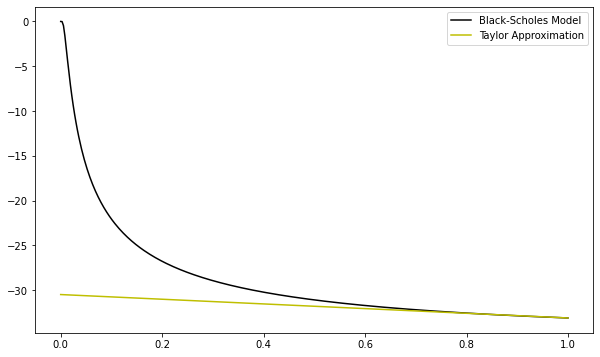

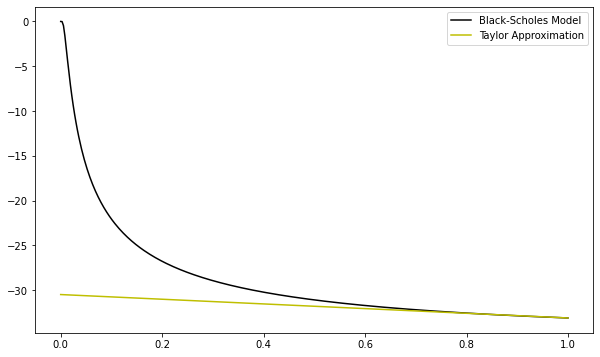

In [132]:
Options('WBA',39.0,1,0.01).taylorPolynomialPut1st()

[*********************100%***********************]  2 of 2 completed


/var/folders/6m/f_ggljg557xf775dl4rrgffr0000gn/T/ipykernel_32915/1445066929.py:343: RuntimeWarning: divide by zero encountered in true_divide
  d1 = np.multiply( 1. / self.sigma * np.divide(1., np.sqrt(tspan)), np.log(self.S/self.K) + (self.r + self.sigma**2 / 2.) * tspan )


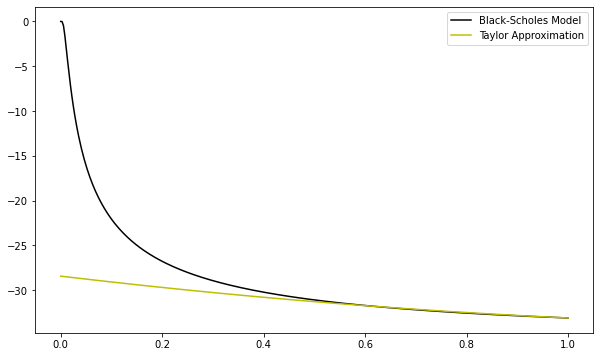

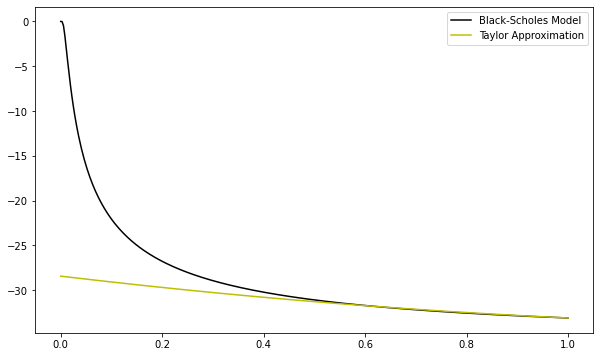

In [133]:
Options('WBA',39.0,1,0.01).taylorPolynomialPut2nd()

[*********************100%***********************]  2 of 2 completed


/var/folders/6m/f_ggljg557xf775dl4rrgffr0000gn/T/ipykernel_32915/1445066929.py:380: RuntimeWarning: divide by zero encountered in true_divide
  d1 = np.multiply( 1. / self.sigma * np.divide(1., np.sqrt(tspan)), np.log(self.S/self.K) + (self.r + self.sigma**2 / 2.) * tspan )


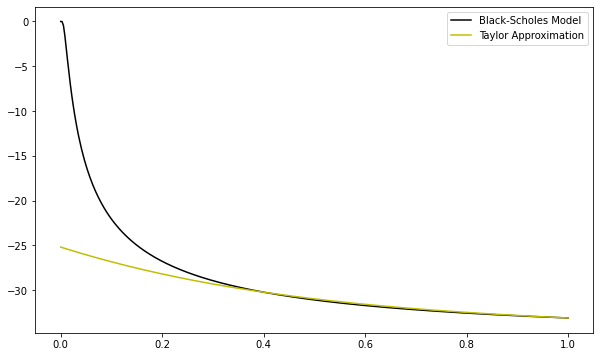

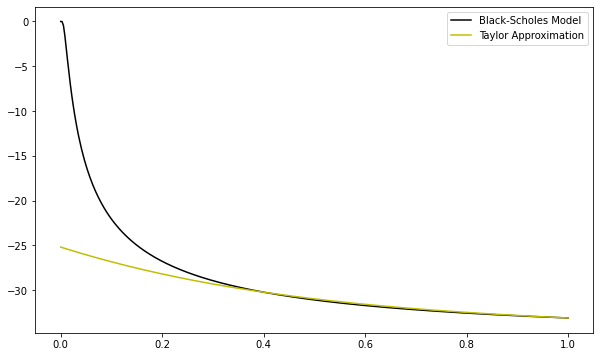

In [134]:
Options('WBA',39,1,0.01).taylorPolynomialPut4th()

[*********************100%***********************]  2 of 2 completed


/var/folders/6m/f_ggljg557xf775dl4rrgffr0000gn/T/ipykernel_32915/1445066929.py:417: RuntimeWarning: divide by zero encountered in true_divide
  d1 = np.multiply( 1. / self.sigma * np.divide(1., np.sqrt(tspan)), np.log(self.S/self.K) + (self.r + self.sigma**2 / 2.) * tspan )


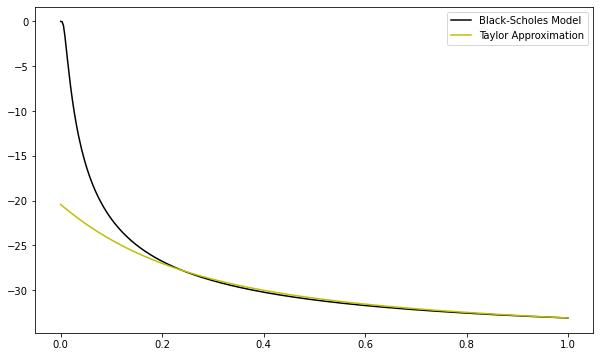

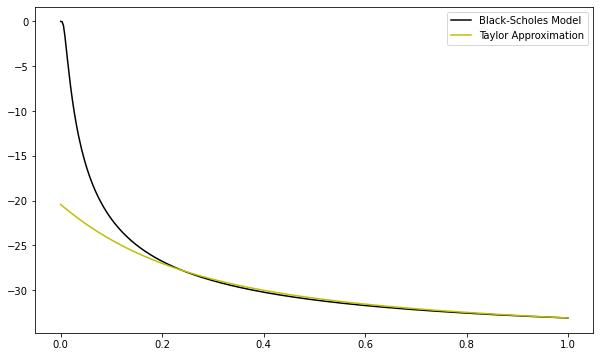

In [135]:
Options('WBA',39.0,1,0.01).taylorPolynomialPut8th()